In [1]:
import pandas as pd
data_ty=pd.read_csv('Tensile stress strength at yield v2(0.3).csv')

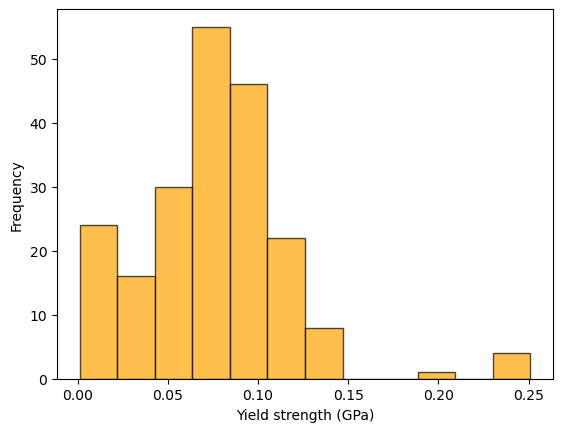

In [13]:
import matplotlib.pyplot as plt

# 'yield_strength' 
plt.hist(data_ty['property_value_median'], bins=12, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('Yield strength (GPa)')
plt.ylabel('Frequency')
#plt.title('Histogram of Yield Strength')
#plt.xlim(0, 0.25)
#plt.show()
plt.savefig('yield_strength_histogram.jpg',dpi=400)

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
def get_Morgan_fingerprint_frequency(smi):
    try:
        mol = Chem.MolFromSmiles(smi)
        info={}
        fp = AllChem.GetMorganFingerprintAsBitVect(mol,3,nBits=2048,bitInfo=info)
        key=[key for key in info.keys()]
        frq=[len(value) for value in info.values()]
        new_info={key: value for key, value in zip(key, frq)}
        mff=[0] * len(list(fp))
        for key, value in new_info.items():
            mff[key] = value
    except:
        mff=None
    return mff

data_ty['morgan_fp_with_freq'] = data_ty['smiles'].apply(get_Morgan_fingerprint_frequency)

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data_ty['morgan_fp_with_freq'].tolist(), data_ty['property_value_median'].tolist(), test_size=0.1, random_state=10)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

score = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
mff_rf_mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
#mape=mean_absolute_percentage_error(y_test,y_pred)
print('MSE:', mff_rf_mse)
print('R2 score:', r2)
print('MAE:',mae)
#print('MAPE',mape)

MSE: 0.000391197357486477
R2 score: 0.8409751461542392
MAE: 0.012401124285714287


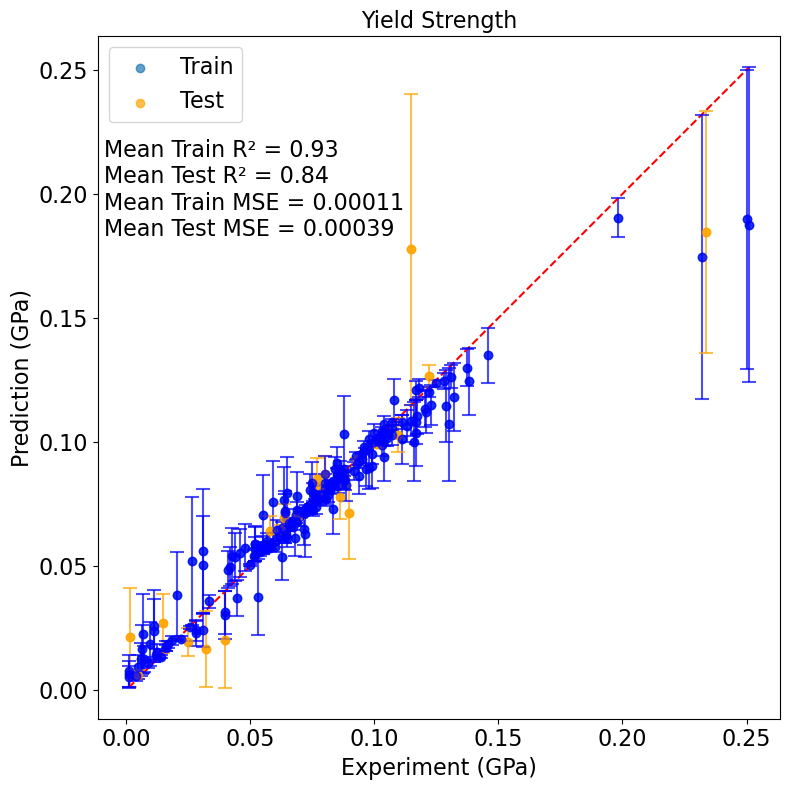

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming your data is already loaded in `data_ty`
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(data_ty['morgan_fp_with_freq'].tolist(), 
                                                    data_ty['property_value_median'].tolist(), 
                                                    test_size=0.1, random_state=10)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and Metrics for Training Data
y_train_pred = rf.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

# Predictions and Metrics for Testing Data
y_test_pred = rf.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(y_train, y_train_pred, label='Train', alpha=0.7)
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.7, color='orange')
plt.plot([min(y_train + y_test), max(y_train + y_test)], 
         [min(y_train + y_test), max(y_train + y_test)], 
         color='red', linestyle='--')

# Adding error bars (optional)
test_errors = [abs(y - yp) for y, yp in zip(y_test, y_test_pred)]
train_errors = [abs(y - yp) for y, yp in zip(y_train, y_train_pred)]
# plt.errorbar(y_test, y_test_pred, yerr=test_errors, fmt='o', color='orange', alpha=0.4)
# plt.errorbar(y_train, y_train_pred, yerr=train_errors, fmt='o', alpha=0.4)

plt.errorbar(y_test, y_test_pred, yerr=test_errors, fmt='o', color='orange', 
             ecolor='orange', elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.7)
plt.errorbar(y_train, y_train_pred, yerr=train_errors, fmt='o', color='blue', 
             ecolor='blue', elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.7)

# Adding text for metrics
plt.text(0.01, 0.85, 
         f"Mean Train R² = {train_r2:.2f}\n"
         f"Mean Test R² = {test_r2:.2f}\n"
         f"Mean Train MSE = {train_mse:.5f}\n"
         f"Mean Test MSE = {test_mse:.5f}\n", 
         transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')

plt.tick_params(axis='both', which='major', labelsize=16) 
plt.xlabel("Experiment (GPa)", fontsize=16)
plt.ylabel("Prediction (GPa)", fontsize=16)
plt.title("Yield Strength", fontsize=16)
plt.legend(fontsize=16)
#plt.grid(alpha=0.3)
plt.tight_layout()
#plt.show()
plt.savefig('pair_plot.jpg',dpi=400)


0.8409751461542392


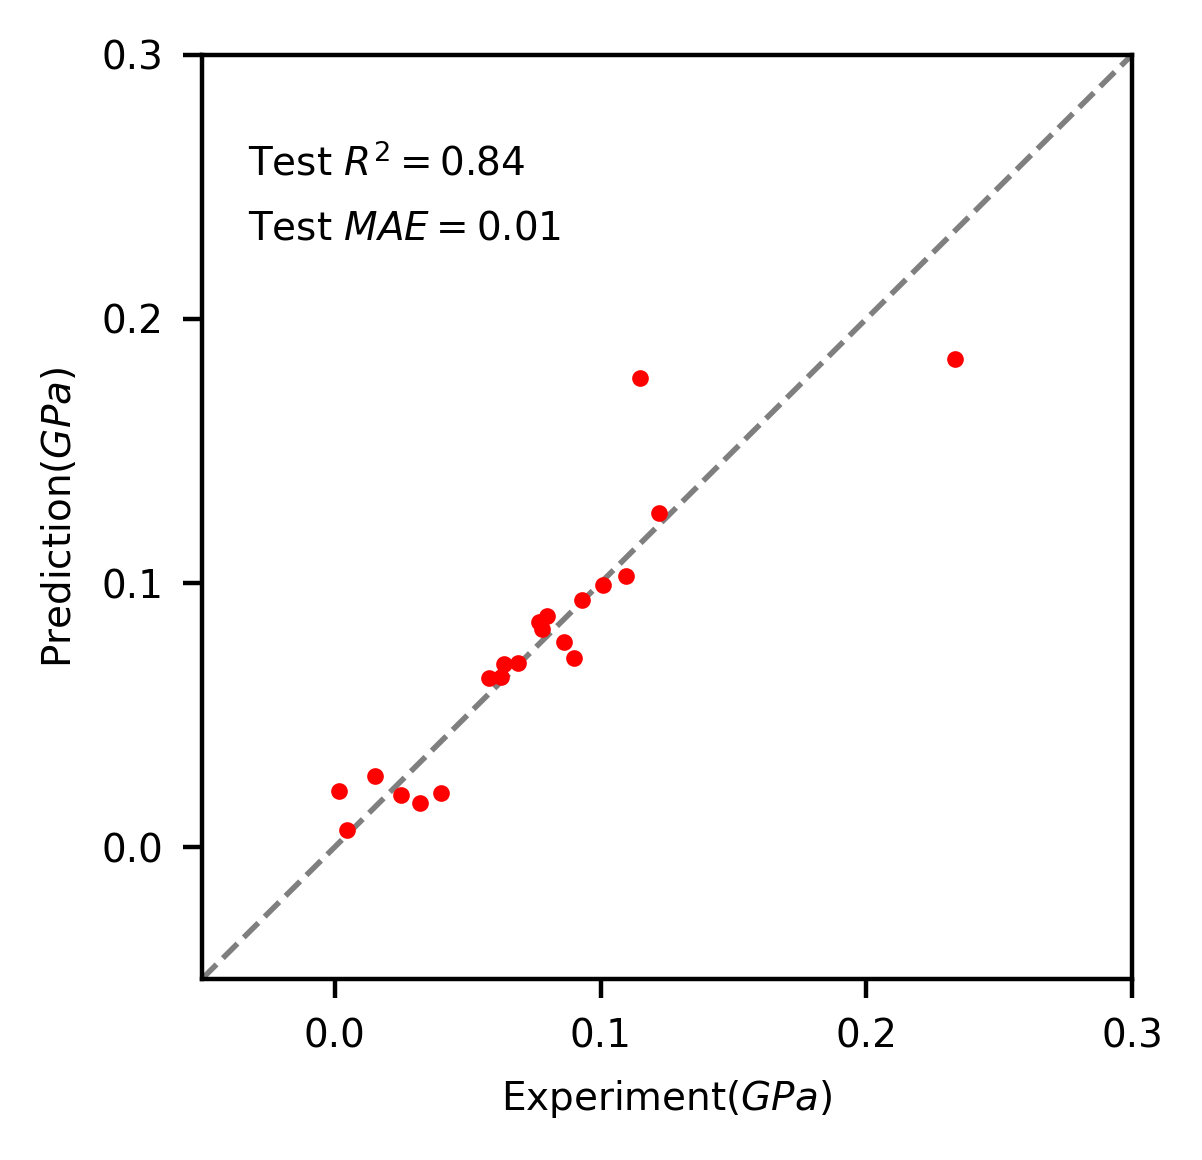

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
def R2(target, predict):
    SSE = sum((target - predict) ** 2)
    SST = sum((target - (target).mean()) ** 2)
    return 1 - (SSE / SST)

x = np.array(y_test)
y = np.array(y_pred)

fig, ax = plt.subplots(figsize=(3, 3), dpi=400)
    # 绘制1:1对角线，linewidth线的粗细，ls线的格式，c线的颜色，
ax.plot((0, 1), (0, 1), linewidth=1, transform=ax.transAxes, ls='--', c='k', label="1:1 line", alpha=0.5)
    # 绘制点，'o'点的形状，点的颜色，markersize点的大小
ax.plot(x, y, 'o', c='red', markersize=2)
 
    # polyfit(x, y, 1)，1代表线性拟合
    # parameter返回的是线性拟合线的斜率和截距
parameter = np.polyfit(x, y, 1)
f = np.poly1d(parameter)
#ax.plot(x, f(x), 'r-', lw=1)
 
    # 计算决定系数R
r2 = R2(x,y)
print(r2)
 
    # 那个框框的设置
bbox = dict(boxstyle="round", fc='1', alpha=0.)
bbox = bbox
    # 在图上安放R2和拟合曲线公式，0.05和0.87是位置偏移量，自己调试
# plt.text(0.05, 0.87, "$R^2=%.2f$\n$y=%.2fx+%.2f$" % ((r2), parameter[0], parameter[1]),
#              transform=ax.transAxes, size=7, bbox=bbox)
plt.text(0.05, 0.87, "Test $R^2=%.2f$" % ((r2)),
             transform=ax.transAxes, size=7, bbox=bbox)
plt.text(0.05, 0.80, "Test $MAE=%.2f$" % ((0.012)),
             transform=ax.transAxes, size=7, bbox=bbox)
 
    # 横轴的设置
ax.set_xlabel('Experiment($GPa$)', fontsize=7)
ax.set_ylabel("Prediction($GPa$)", fontsize=7)
 
    # 设置图片title
ax.tick_params(labelsize=7)
#ax.set_title("prediction of tensile stress strength at yield", fontsize=7)
 
x_major_locator = MultipleLocator(0.1)
ax.xaxis.set_major_locator(x_major_locator)
y_major_locator = MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
    # 坐标轴
ax.set(xlim=(-0.05, 0.3), ylim=(-0.05, 0.3))
 
    # plt.savefig("out.png", bbox_inches='tight')
#plt.show()
plt.savefig('pair_plot.jpg',dpi=400,bbox_inches='tight')


In [18]:
def get_maccs_fingerprint(smi):
    try:
        mol=Chem.MolFromSmiles(smi)
        fps = AllChem.GetMACCSKeysFingerprint(mol)
    except:
        fps=None
    return fps

def get_morgan_fp(smi):
    try:
        mol = Chem.MolFromSmiles(smi)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024)
        fp=list(fp)
    except:
        fp=None
    return fp

In [40]:
data_ty['morgan_fp'] = data_ty['smiles'].apply(get_morgan_fp)
data_ty['maccs_fp'] = data_ty['smiles'].apply(get_maccs_fingerprint)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data_ty['morgan_fp'].tolist(), data_ty['property_value_median'].tolist(), test_size=0.1, random_state=10)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

score = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
mf_rf_mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mf_rf_mae=mean_absolute_error(y_test, y_pred)
#mape=mean_absolute_percentage_error(y_test,y_pred)
print('MSE:', mf_rf_mse)
print('R2 score:', r2)
print('MAE:',mf_rf_mae)
#print('MAPE',mape)

MSE: 0.0004493696412792071
R2 score: 0.8173276476449151
MAE: 0.012615239387755097


In [42]:
X_train, X_test, y_train, y_test = train_test_split(data_ty['maccs_fp'].tolist(), data_ty['property_value_median'].tolist(), test_size=0.1, random_state=10)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

score = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
maccs_rf_mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
maccs_rf_mae=mean_absolute_error(y_test, y_pred)
#mape=mean_absolute_percentage_error(y_test,y_pred)
print('MSE:', maccs_rf_mse)
print('R2 score:', r2)
print('MAE:',maccs_rf_mae)
#print('MAPE',mape)

MSE: 0.00039721295793714517
R2 score: 0.8385297564700948
MAE: 0.01458762742178457


In [43]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# 假设您有如下的 train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data_ty['maccs_fp'].tolist(), data_ty['property_value_median'].tolist(), test_size=0.1, random_state=10)

# 初始化 XGBoost 模型
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# 训练模型
xgb_model.fit(X_train, y_train)

# 测试模型并评估表现
y_pred = xgb_model.predict(X_test)

# 计算评估指标
maccs_xgb_mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
maccs_xgb_mae = mean_absolute_error(y_test, y_pred)

# 输出结果
print('MSE:', maccs_xgb_mse)
print('R2 score:', r2)
print('MAE:', maccs_xgb_mae)


MSE: 0.0005598927919603808
R2 score: 0.7723991031461087
MAE: 0.01636292222165849


In [44]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# 假设您有如下的 train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data_ty['morgan_fp'].tolist(), data_ty['property_value_median'].tolist(), test_size=0.1, random_state=10)

# 初始化 XGBoost 模型
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# 训练模型
xgb_model.fit(X_train, y_train)

# 测试模型并评估表现
y_pred = xgb_model.predict(X_test)

# 计算评估指标
mf_xgb_mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mf_xgb_mae = mean_absolute_error(y_test, y_pred)

# 输出结果
print('MSE:', mf_xgb_mse)
print('R2 score:', r2)
print('MAE:', mf_xgb_mae)


MSE: 0.0008500350632216422
R2 score: 0.6544539498908387
MAE: 0.016208716914513283


In [45]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# 假设您有如下的 train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data_ty['morgan_fp_with_freq'].tolist(), data_ty['property_value_median'].tolist(), test_size=0.1, random_state=10)

# 初始化 XGBoost 模型
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# 训练模型
xgb_model.fit(X_train, y_train)

# 测试模型并评估表现
y_pred = xgb_model.predict(X_test)

# 计算评估指标
mff_xgb_mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mff_xgb_mae = mean_absolute_error(y_test, y_pred)

# 输出结果
print('MSE:', mff_xgb_mse)
print('R2 score:', r2)
print('MAE:', mff_xgb_mae)


MSE: 0.0005933745181662275
R2 score: 0.7587885137223992
MAE: 0.013673404811593747


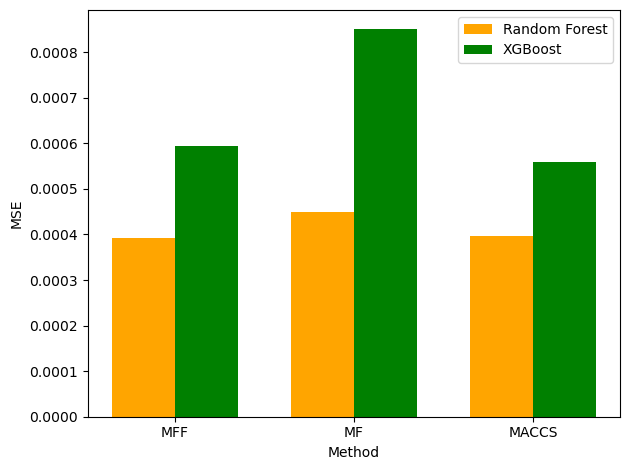

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# 假设你有以下数据
methods = ['MFF', 'MF', 'MACCS']
mse_rf = [mff_rf_mse,mf_rf_mse,maccs_rf_mse]  # 随机森林模型的 MSE
mse_xgb = [mff_xgb_mse,mf_xgb_mse,maccs_xgb_mse]  # XGBoost 模型的 MSE

# 设置柱状图参数
bar_width = 0.35  # 柱的宽度
index = np.arange(len(methods))  # 方法的索引

# 创建柱状图
fig, ax = plt.subplots()
bar_rf = ax.bar(index, mse_rf, bar_width, label='Random Forest', color='orange')
bar_xgb = ax.bar(index + bar_width, mse_xgb, bar_width, label='XGBoost', color='g')

# 添加标签和标题
ax.set_xlabel('Method')
ax.set_ylabel('MSE')
#ax.set_title('Comparison of MSE between Random Forest and XGBoost')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(methods)
ax.legend()

# 显示图表
plt.tight_layout()
#plt.show()
plt.savefig('mse.jpg',dpi=400,bbox_inches='tight')
